# Practica 3: Histograma para generar vectores de caractersticas

### 1. Objetivos

El alumno:
* Aprendera a calcular el histograma global y local de la imagen
* Entendera como calcular la distancia de error entre dos histogramas

### 2. Introduccion


### 3. Desarrollo

In [373]:
import cv2
from skimage import util
from skimage import color
from skimage import exposure
from skimage import measure
from skimage import morphology
from skimage.filters import rank
from skimage import img_as_ubyte
from scipy import signal
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A.1 Ecualizacion local

# Realizar la ecualizacion del histograma, de forma local en una ventana nxn
def local_hist_eq(im, n):
    grays = np.arange(256)        # Niveles de gris
    for 

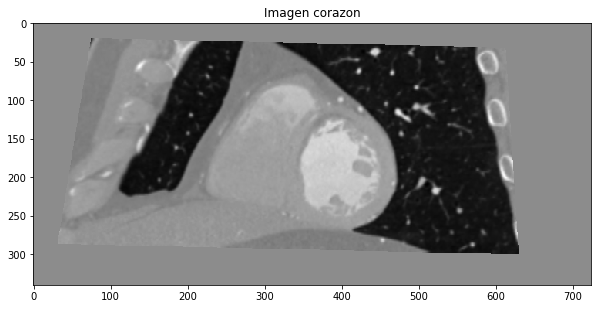

In [374]:
imgs = []

for i in range(1,11):
    imgs.append(cv2.imread('im_1_'+str(i)+'.png', 0))

plt.figure(figsize=(10,7))
plt.imshow(imgs[7], cmap='gray')
plt.title('Imagen corazon')
plt.show()

In [375]:
# Ecualizacion local de la imagen 
im_local_eq7 = rank.equalize(imgs[7], selem=np.ones((7,7)))
im_local_eq11 = rank.equalize(imgs[7], selem=np.ones((11,11)))

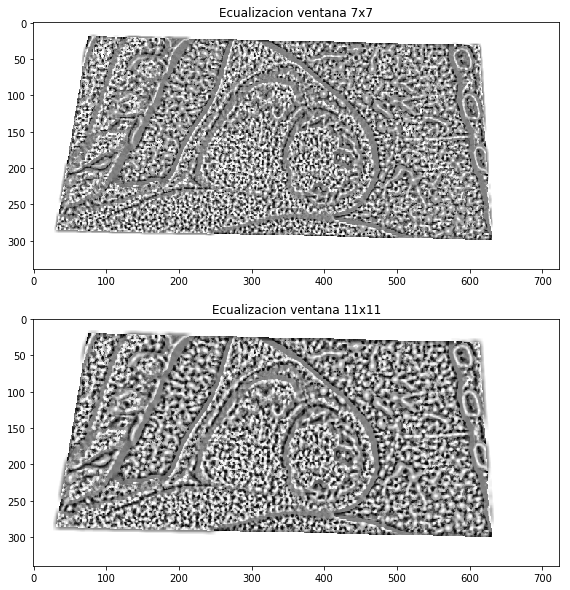

In [413]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.imshow(im_local_eq7, cmap='gray')
plt.title('Ecualizacion ventana 7x7')
plt.subplot(212)
plt.imshow(im_local_eq11, cmap='gray')
plt.title('Ecualizacion ventana 11x11')
plt.show()

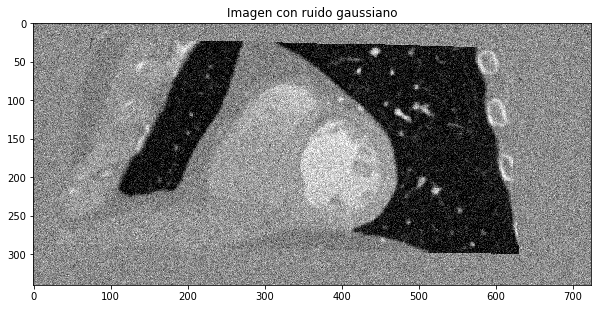

In [377]:
# Agregar ruido gaussiano a la imagen
im_noise = util.random_noise(imgs[7], mode='gaussian', var=0.01)

plt.figure(figsize=(10,10))
plt.imshow(im_noise, cmap='gray')
plt.title('Imagen con ruido gaussiano')
plt.show()

In [378]:
# Ecualizacion de las imagenes con ruido
im_nleq33 = rank.equalize(imgs[7], selem=np.ones((3,3)))
im_nleq55 = rank.equalize(imgs[7], selem=np.ones((15,15)))

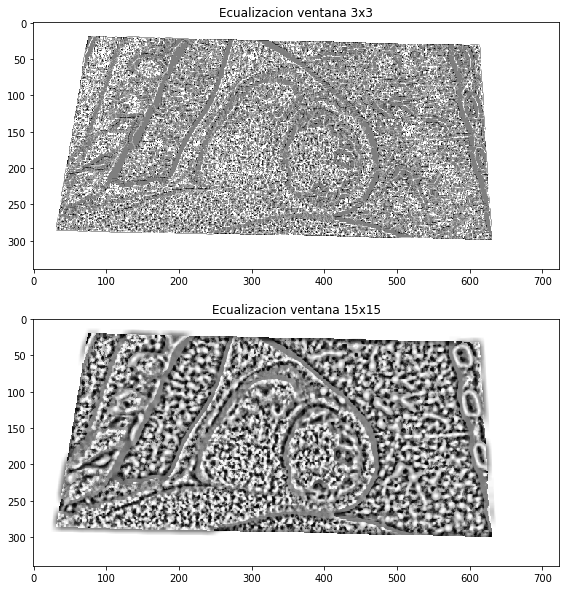

In [412]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.imshow(im_nleq33, cmap='gray')
plt.title('Ecualizacion ventana 3x3')
plt.subplot(212)
plt.imshow(im_nleq55, cmap='gray')
plt.title('Ecualizacion ventana 15x15')
plt.show()

### A.2 Distancia Chi-Square entre histogramas


In [380]:
# Convolucion de las imagenes con el filtro binomial 7x7
bin7 = np.array([1,6,15,20,15,6,1])                          
binKernel =  np.outer(bin7, bin7)       
binKernel = binKernel * (1/np.sum(binKernel)) 

imgs_binomial = []

for i in range(10):
    imgs_binomial.append(signal.convolve2d(imgs[i], binKernel, 'same'))

In [381]:
# Concatenacion de las imagenes filtradas
a1 = np.hstack((imgs_binomial[7], imgs_binomial[1]))
a2 = np.hstack((imgs_binomial[2], imgs_binomial[3]))
a3 = np.vstack((a1, a2))

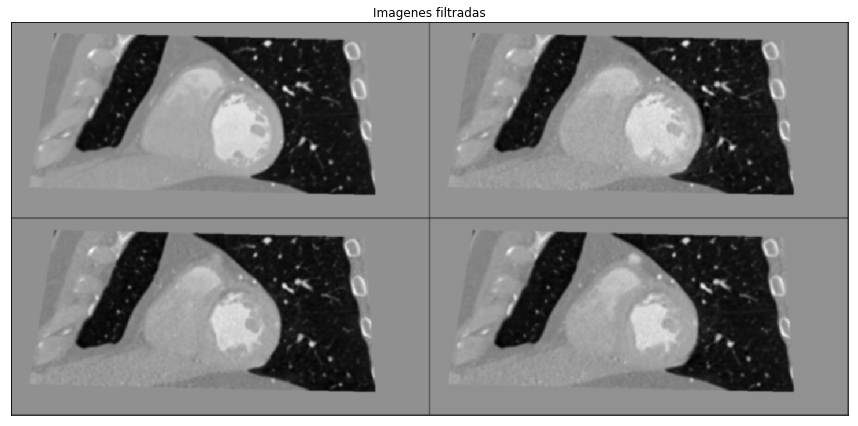

In [382]:
plt.figure(figsize=(15,10))
plt.imshow(a3, cmap='gray')
plt.title('Imagenes filtradas')
plt.xticks([])
plt.yticks([])
plt.show()

In [383]:
# Calculo de los histogramas

imgs_hist = []
imgs_bin_hist = []

for i in range(10):
    imgs_hist.append(exposure.histogram(imgs[i], nbins=256))
    imgs_bin_hist.append(exposure.histogram(imgs_binomial[i], nbins=256))

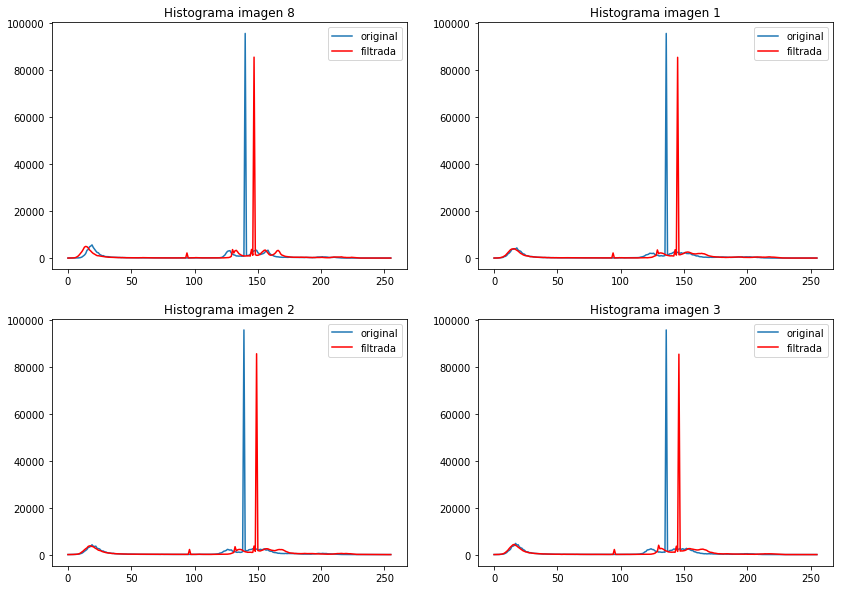

In [384]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(imgs_hist[7][0])
plt.plot(imgs_bin_hist[7][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 8')
plt.subplot(222)
plt.plot(imgs_hist[0][0])
plt.plot(imgs_bin_hist[0][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 1')
plt.subplot(223)
plt.plot(imgs_hist[1][0])
plt.plot(imgs_bin_hist[1][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 2')
plt.subplot(224)
plt.plot(imgs_hist[2][0])
plt.plot(imgs_bin_hist[2][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 3')
plt.show()

In [385]:
# Funcion que calcula la distancia chi-square entre dos histogramas
def chi_square(hist1, hist2):
    d = 0
    for n1, n2 in zip(hist1, hist2):
        d += np.square(n1-n2)
    return d

In [386]:
print('Distancia entre histogramas:\n')
print('Imagen 8')
print('original vs filtrada:', chi_square(imgs_hist[7][0], imgs_bin_hist[7][0]))
print('original vs original: ', chi_square(imgs_hist[7][0], imgs_hist[7][0]))
print('\nImagen 1')
print('original vs filtrada:', chi_square(imgs_hist[0][0], imgs_bin_hist[0][0]))
print('original vs original: ', chi_square(imgs_hist[0][0], imgs_hist[0][0]))
print('\nImagen 2')
print('original vs filtrada:', chi_square(imgs_hist[1][0], imgs_bin_hist[1][0]))
print('original vs original: ', chi_square(imgs_hist[1][0], imgs_hist[1][0]))
print('\nImagen 3')
print('original vs filtrada:', chi_square(imgs_hist[2][0], imgs_bin_hist[2][0]))
print('original vs original: ', chi_square(imgs_hist[2][0], imgs_hist[2][0]))

Distancia entre histogramas:

Imagen 8
original vs filtrada: 15915168348
original vs original:  0

Imagen 1
original vs filtrada: 15826446324
original vs original:  0

Imagen 2
original vs filtrada: 15883192296
original vs original:  0

Imagen 3
original vs filtrada: 15901074538
original vs original:  0


In [387]:
'''
https://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons
https://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box
http://deeplearning.net/software/pylearn2/
http://deeplearning.net/software/theano/

'''

'\nhttps://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons\nhttps://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box\nhttp://deeplearning.net/software/pylearn2/\nhttp://deeplearning.net/software/theano/\n\n'

### B.1 Reconocimiento mediante analisis del histograma

In [388]:
# Creacion del parche y la mascara para calcular el histograma en la imagen
patch = np.ones((30, 30), dtype='uint8')
mask1 = np.pad(patch, ((150,160), (370,324)), 'constant')
mask2 = np.pad(patch, ((190,120), (350,344)), 'constant')
mask3 = np.pad(patch, ((200,110), (400,294)), 'constant')

In [389]:
imgs[0].shape

(340, 724)

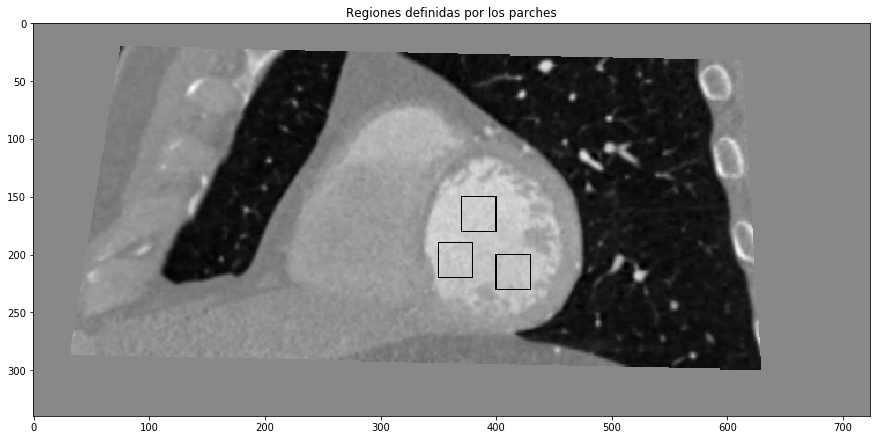

In [391]:
# Ubicacion del parche que se uso para calcular el histograma promedio
plt.figure(figsize=(15,10))
img_label = imgs[0].copy()
plt.imshow(cv2.rectangle(img_label,(370,150),(400,180),(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label,(350,190),(380,220),(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label,(400,200),(430,230),(0)), cmap='gray')
plt.title('Regiones definidas por los parches')
plt.show()

In [392]:
# Calcular el histograma en el parche definido
hist_mask1 = cv2.calcHist([imgs[0]], None, mask1, [256], [0,255])
hist_mask2 = cv2.calcHist([imgs[0]], None, mask2, [256], [0,255])
hist_mask3 = cv2.calcHist([imgs[0]], None, mask3, [256], [0,255])

In [393]:
# Calcular el histograma promedio
hist_avg = np.zeros((256,1))

hist_avg = (hist_mask1 + hist_mask2 + hist_mask3)/3

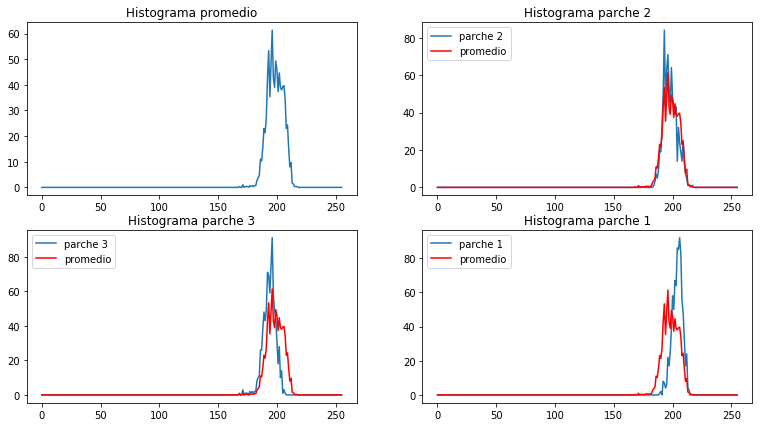

In [414]:
plt.figure(figsize=(13,7))
plt.subplot(221)
plt.plot(hist_avg)
plt.title('Histograma promedio')
plt.subplot(222)
plt.plot(hist_mask2)
plt.plot(hist_avg, 'r')
plt.legend(['parche 2', 'promedio'])
plt.title('Histograma parche 2')
plt.subplot(223)
plt.plot(hist_mask3)
plt.plot(hist_avg, 'r')
plt.legend(['parche 3', 'promedio'])
plt.title('Histograma parche 3')
plt.subplot(224)
plt.plot(hist_mask1)
plt.plot(hist_avg, 'r')
plt.legend(['parche 1', 'promedio'])
plt.title('Histograma parche 1')
plt.show()

In [396]:
chi_square(hist_avg.reshape(256), hist_mask3.reshape(256))

13916.222293302417

In [405]:
# Barrido del parche sobre la imagen

x1, y1 = 0, 0
x2, y2 = 0, 0
local_hists = []                           # Histogramas locales
err_dist = np.full(imgs[0].shape, 850000)  # Distancias entre histogramas
err_mask = np.zeros(imgs[0].shape)         # Imagen binaria (regiones con menor distancias)
  
for i in range(0, 340-30, 30):
    for j in range(0, 724-30, 30):
        # Determinar las coordenadas de 2 vertices de la region
        # para obtener una mascara, se usara para calcular el 
        # histograma en la region de interes
        x1, y1 = j, i
        x2, y2 = x1+30, y1+30
        # Creacion de la mascara con el parche
        mask = np.pad(patch, ((y1, 340-y2), (x1, 724-x2)), 'constant')
        local_hist = cv2.calcHist([imgs[0]], None, mask, [256], [0,255])
        local_hists.append(local_hist)
        # Calculo de la distancia entre histogramas (promedio y local)
        hdistance = chi_square(hist_avg, local_hist)
        err_dist[y1:y2, x1:x2] = hdistance
        if hdistance < 50000:
            err_mask[y1:y2, x1:x2] = 1

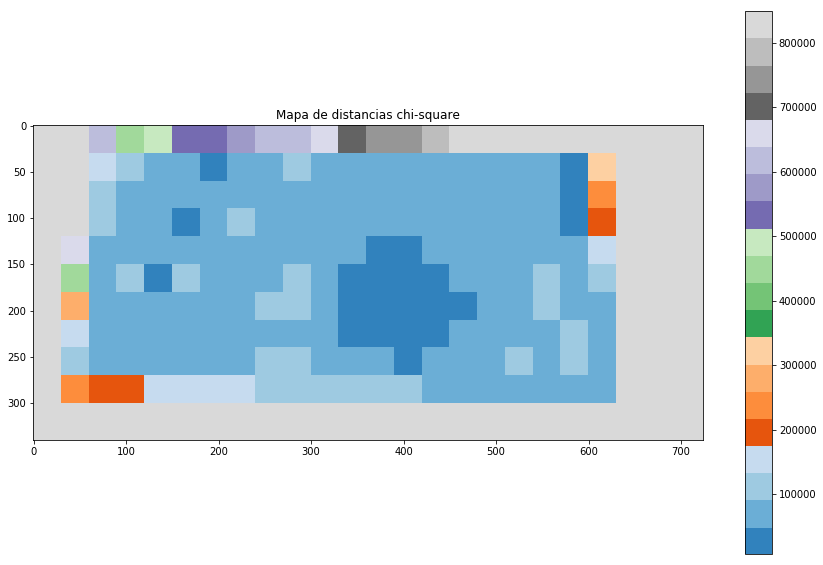

In [401]:
plt.figure(figsize=(15,10))
plt.imshow(err_dist, cmap='tab20c')
plt.title('Mapa de distancias chi-square')
plt.colorbar()
plt.show()

In [410]:
ret, err_mask = cv2.threshold(err_dist,40000,50000,cv2.THRESH_BINARY)

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\thresh.cpp:1509: error: (-210)  in function cv::threshold


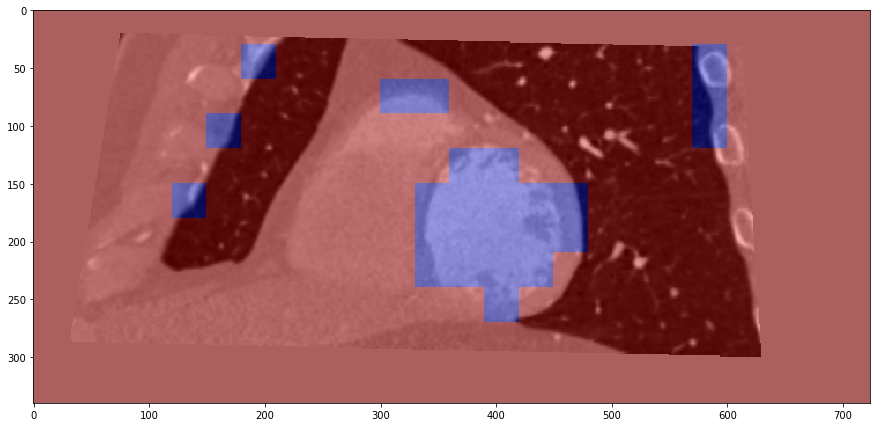

In [404]:
plt.figure(figsize=(15, 10))
plt.imshow(color.label2rgb(err_mask, image=imgs[0]))
plt.show()